# Estimating Gestational Diabetes Onset
### Reverse Timeseries Forecasting

## Pre-processing

<ul>
	<li><a href="#Imports"><strong>Imports</strong></a></li>
	<li><a href="#Notebook-Settings"><strong>Notebook Settings</a></li>
	<li><a href="#Load-the-data"><strong>Loading the data</strong></a>
		<ul>
			<li>Setting the index</li>
			<li>Reverse the timeseries</li>
		</ul>
	</li>
    <li><a href="#Visualize"><strong>Visualize</strong></a>
		<ul>
			<li>Seasonal Decompose</li>
		</ul>
	</li>
    <li><a href="#Stationarity"><strong>Stationarity</strong></a>
		<ul>
			<li>Dickey Fuller Test</li>
		</ul>
	</li>
    <li><a href="#ACF-and-PACF"><strong>ACF and PACF</strong></a></li>
</ul>


### Imports

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

### Notebook Settings

In [2]:
pd.set_option('display.max_rows', 500)

### Load the data

In [3]:
df = pd.read_csv('data/data_cleaned.csv')
daily = pd.read_csv('data/daily_cleaned.csv')

In [4]:
df.datetime = pd.to_datetime(df.datetime)
daily.date = pd.to_datetime(daily.date)

df.set_index('datetime')
daily.set_index('date')

,daycount,bg_fasting,bg_avg,carbs_sum,meds_dose
date,,,,,
2021-03-11,1,104.0,109,138,0
2021-03-12,2,101.0,110,157,0
2021-03-13,3,96.0,120,154,0
2021-03-14,4,93.0,106,87,0
2021-03-15,5,89.0,108,135,0
2021-03-16,6,92.0,108,110,0
2021-03-17,7,100.0,98,151,0
2021-03-18,8,98.0,114,136,0
2021-03-19,9,100.0,128,136,0


**REVERSE**

In [5]:
df_reverse = df.iloc[::-1]
daily_reverse = daily.iloc[::-1]

In [6]:
df_reverse.set_index('datetime', inplace=True)
df_reverse.head()

,type,value,unit,month,date,daycount,subtype,outOfRange
datetime,,,,,,,,
2021-05-23 21:56:00,Carbs,14,g,5,2021-05-23,74,snack_night,False
2021-05-23 21:17:00,Blood Sugar Reading,105,mg/dL,5,2021-05-23,74,after_dinner,False
2021-05-23 20:16:00,Carbs,23,g,5,2021-05-23,74,dinner,False
2021-05-23 15:16:00,Carbs,34,g,5,2021-05-23,74,lunch,False
2021-05-23 12:45:00,Carbs,23,g,5,2021-05-23,74,snack_morning,False


In [7]:
daily_reverse.set_index('date', inplace=True)

In [8]:
daily_reverse.index = pd.DatetimeIndex(daily_reverse.index, freq="-1D")
daily_reverse.index

DatetimeIndex(['2021-05-23', '2021-05-22', '2021-05-21', '2021-05-20',
               '2021-05-19', '2021-05-18', '2021-05-17', '2021-05-16',
               '2021-05-15', '2021-05-14', '2021-05-13', '2021-05-12',
               '2021-05-11', '2021-05-10', '2021-05-09', '2021-05-08',
               '2021-05-07', '2021-05-06', '2021-05-05', '2021-05-04',
               '2021-05-03', '2021-05-02', '2021-05-01', '2021-04-30',
               '2021-04-29', '2021-04-28', '2021-04-27', '2021-04-26',
               '2021-04-25', '2021-04-24', '2021-04-23', '2021-04-22',
               '2021-04-21', '2021-04-20', '2021-04-19', '2021-04-18',
               '2021-04-17', '2021-04-16', '2021-04-15', '2021-04-14',
               '2021-04-13', '2021-04-12', '2021-04-11', '2021-04-10',
               '2021-04-09', '2021-04-08', '2021-04-07', '2021-04-06',
               '2021-04-05', '2021-04-04', '2021-04-03', '2021-04-02',
               '2021-04-01', '2021-03-31', '2021-03-30', '2021-03-29',
      

**Save the target variable**

In [9]:
y = daily_reverse.bg_fasting

In [10]:
y.head()

date
2021-05-23    86.0
2021-05-22    85.0
2021-05-21    88.0
2021-05-20    93.0
2021-05-19    90.0
Freq: -1D, Name: bg_fasting, dtype: float64

### Visualize

**Seasonal Decompose**

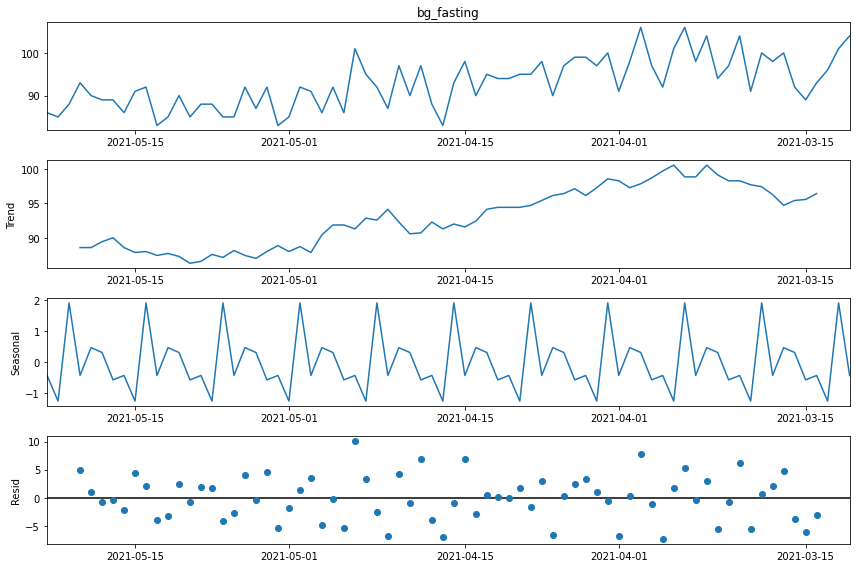

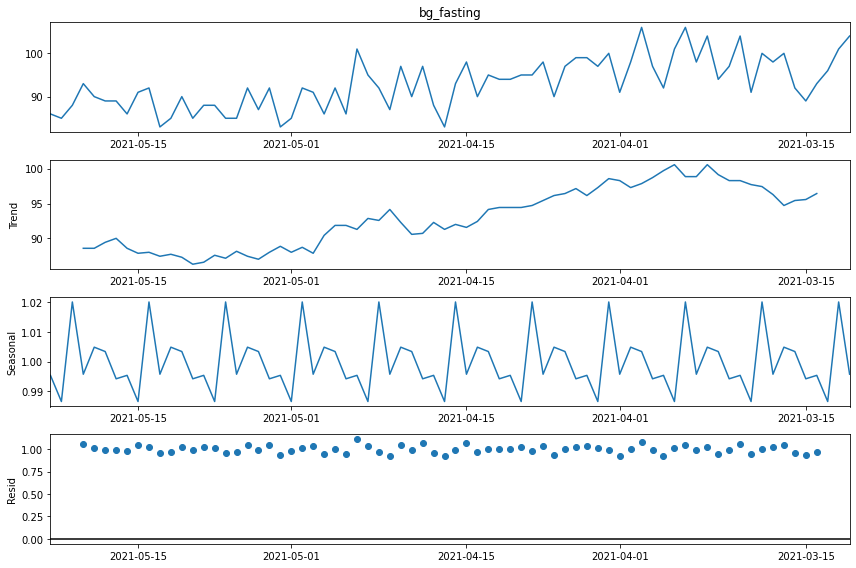

In [11]:
rcParams['figure.figsize'] = 12,8

# Plot the original data, the trend, the seasonality, and the residuals 
decomp_add = seasonal_decompose(y, model='additive')
decomp_add.plot()

decomp_mlt = seasonal_decompose(y, model='multiplicative')
decomp_mlt.plot()

plt.show()

### Stationarity

In [88]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(7).mean()
    rolstd = timeseries.rolling(7).std()
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    
    plt.savefig('vis/stationarity.png', bbox_inches="tight")
    plt.show()
    
     #Perform Dickey-Fuller test:
    print( 'Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print( dfoutput) 

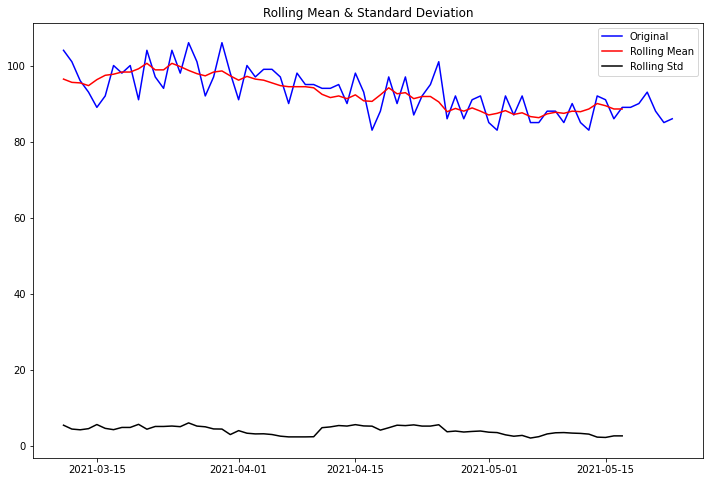

Results of Dickey-Fuller Test:
Test Statistic                 -0.829570
p-value                         0.810282
#Lags Used                      5.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64


In [89]:
test_stationarity(y)

Because the Test Statistic is greater than the Critical Value the time series is stationary. <br />
No transformations need to be done.

### ACF and PACF

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


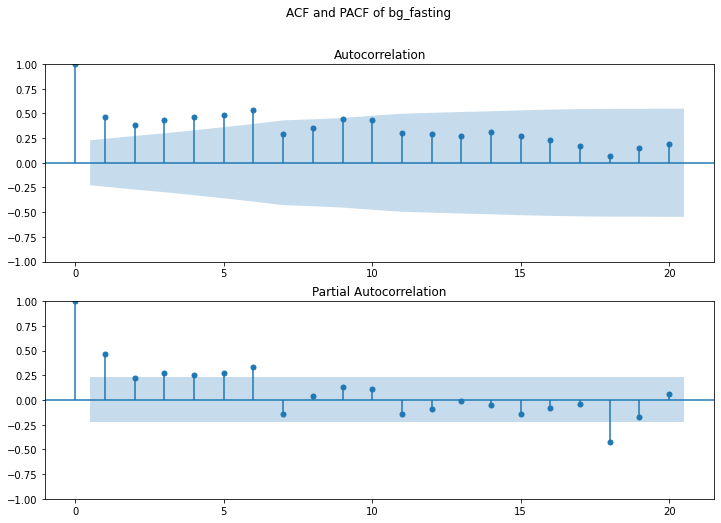

In [90]:
# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(y, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(y, lags=20, ax=axes[1])

plt.suptitle('ACF and PACF of bg_fasting')

plt.savefig('vis/acf-pacf.png', bbox_inches="tight")
plt.show()

**Notes**

The ACF shows positive correlations for all visualized lags. According to Duke University's guide on ARIMA models this indicates that the data likely needs a higher order of differencing (Rule 1). Let's diff.

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


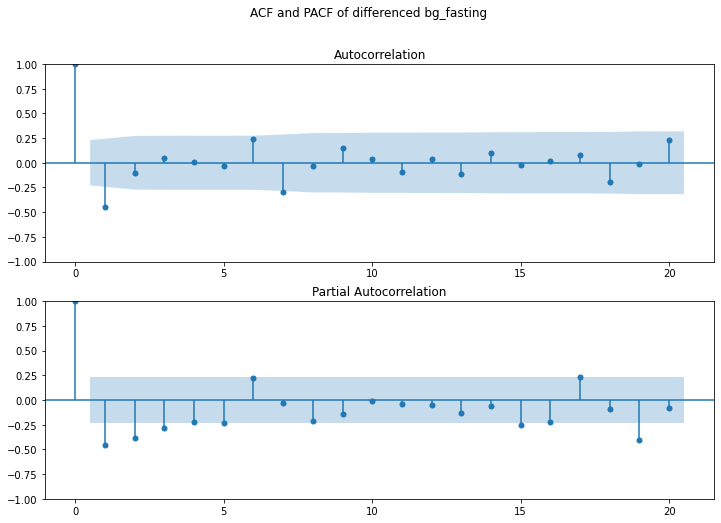

In [91]:
y_diff = y.diff()
y_diff = y_diff.dropna()

fig, axes = plt.subplots(2,1)

plot_acf(y_diff, lags=20, ax=axes[0])
plot_pacf(y_diff, lags=20, ax=axes[1])

plt.suptitle('ACF and PACF of differenced bg_fasting')

plt.savefig('vis/acf-pacf-diff.png', bbox_inches="tight")
plt.show()

<p>Rule 7: If the autocorrelation function (ACF) of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is negative--i.e., if the series appears slightly "overdifferenced"--then consider adding an MA term to the model. The lag beyond which the ACF cuts off is the indicated number of MA terms.</p>
<p>MA +1</p>

In [16]:
print('STD of non-differenced y:', y.std())
print('STD of differenced y:', y_diff.std())

STD of non-differenced y: 5.887002104643878
STD of differenced y: 5.971647878651736


In [ ]:
# TODO: cross validate?

In [49]:
# Import the module for estimating an ARMA model
# from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARIMA(y_diff, order=(1,0, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARIMA(y_diff, order=(2,0, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARIMA(y_diff, order=(1,0,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471

The AIC for an AR(1) is:  456.9062274845014
The AIC for an AR(2) is:  447.6668051201794
The AIC for an ARMA(1,1) is:  432.8241959471815


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

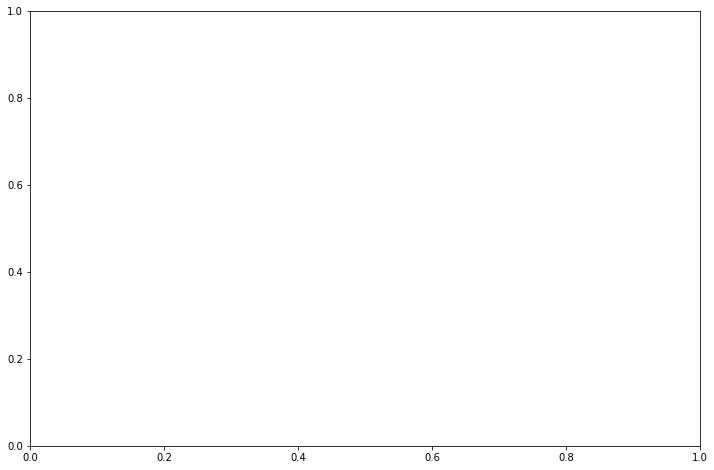

In [51]:
# Forecast using an ARIMA(1,1,1) model
mod = ARIMA(y, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
plot_predict(res, start='2021-05-27', end='2020-10-01')
plt.show()

In [52]:
type(y.index), y.index.dtype

(pandas.core.indexes.datetimes.DatetimeIndex, dtype('<M8[ns]'))

In [53]:
y.index.is_monotonic

False

In [54]:
y.index.is_monotonic_decreasing

True

In [55]:
y.index.is_monotonic

False

In [56]:
daily

,date,daycount,bg_fasting,bg_avg,carbs_sum,meds_dose
0,2021-03-11,1,104.0,109,138,0
1,2021-03-12,2,101.0,110,157,0
2,2021-03-13,3,96.0,120,154,0
3,2021-03-14,4,93.0,106,87,0
4,2021-03-15,5,89.0,108,135,0
5,2021-03-16,6,92.0,108,110,0
6,2021-03-17,7,100.0,98,151,0
7,2021-03-18,8,98.0,114,136,0
8,2021-03-19,9,100.0,128,136,0
9,2021-03-20,10,91.0,110,169,0


In [57]:
date_forward = daily.date
date_forward

0    2021-03-11
1    2021-03-12
2    2021-03-13
3    2021-03-14
4    2021-03-15
5    2021-03-16
6    2021-03-17
7    2021-03-18
8    2021-03-19
9    2021-03-20
10   2021-03-21
11   2021-03-22
12   2021-03-23
13   2021-03-24
14   2021-03-25
15   2021-03-26
16   2021-03-27
17   2021-03-28
18   2021-03-29
19   2021-03-30
20   2021-03-31
21   2021-04-01
22   2021-04-02
23   2021-04-03
24   2021-04-04
25   2021-04-05
26   2021-04-06
27   2021-04-07
28   2021-04-08
29   2021-04-09
30   2021-04-10
31   2021-04-11
32   2021-04-12
33   2021-04-13
34   2021-04-14
35   2021-04-15
36   2021-04-16
37   2021-04-17
38   2021-04-18
39   2021-04-19
40   2021-04-20
41   2021-04-21
42   2021-04-22
43   2021-04-23
44   2021-04-24
45   2021-04-25
46   2021-04-26
47   2021-04-27
48   2021-04-28
49   2021-04-29
50   2021-04-30
51   2021-05-01
52   2021-05-02
53   2021-05-03
54   2021-05-04
55   2021-05-05
56   2021-05-06
57   2021-05-07
58   2021-05-08
59   2021-05-09
60   2021-05-10
61   2021-05-11
62   202

In [58]:
reverse = daily.iloc[::-1]
reverse.head()

,date,daycount,bg_fasting,bg_avg,carbs_sum,meds_dose
73,2021-05-23,74,86.0,114,131,2000
72,2021-05-22,73,85.0,112,133,2000
71,2021-05-21,72,88.0,110,133,2000
70,2021-05-20,71,93.0,126,169,2000
69,2021-05-19,70,90.0,111,148,2000


In [59]:
reverse.reset_index(inplace=True)

In [60]:
reverse = reverse.join(date_forward, on=reverse.index, how='left', rsuffix='_forward')


In [61]:
reverse.dtypes

index                    int64
date            datetime64[ns]
daycount                 int64
bg_fasting             float64
bg_avg                   int64
carbs_sum                int64
meds_dose                int64
date_forward    datetime64[ns]
dtype: object

In [62]:
reverse = reverse.set_index('date_forward')

In [63]:
reverse.drop(columns=['index'], inplace=True)

In [64]:
reverse

,date,daycount,bg_fasting,bg_avg,carbs_sum,meds_dose
date_forward,,,,,,
2021-03-11,2021-05-23,74,86.0,114,131,2000
2021-03-12,2021-05-22,73,85.0,112,133,2000
2021-03-13,2021-05-21,72,88.0,110,133,2000
2021-03-14,2021-05-20,71,93.0,126,169,2000
2021-03-15,2021-05-19,70,90.0,111,148,2000
2021-03-16,2021-05-18,69,89.0,110,145,2000
2021-03-17,2021-05-17,68,89.0,103,135,2000
2021-03-18,2021-05-16,67,86.0,105,155,2000
2021-03-19,2021-05-15,66,91.0,107,118,2000


In [65]:
reverse.index = pd.DatetimeIndex(reverse.index, freq="D")
reverse.index

DatetimeIndex(['2021-03-11', '2021-03-12', '2021-03-13', '2021-03-14',
               '2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18',
               '2021-03-19', '2021-03-20', '2021-03-21', '2021-03-22',
               '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26',
               '2021-03-27', '2021-03-28', '2021-03-29', '2021-03-30',
               '2021-03-31', '2021-04-01', '2021-04-02', '2021-04-03',
               '2021-04-04', '2021-04-05', '2021-04-06', '2021-04-07',
               '2021-04-08', '2021-04-09', '2021-04-10', '2021-04-11',
               '2021-04-12', '2021-04-13', '2021-04-14', '2021-04-15',
               '2021-04-16', '2021-04-17', '2021-04-18', '2021-04-19',
               '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23',
               '2021-04-24', '2021-04-25', '2021-04-26', '2021-04-27',
               '2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01',
               '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05',
      

In [66]:
y_r = reverse.bg_fasting

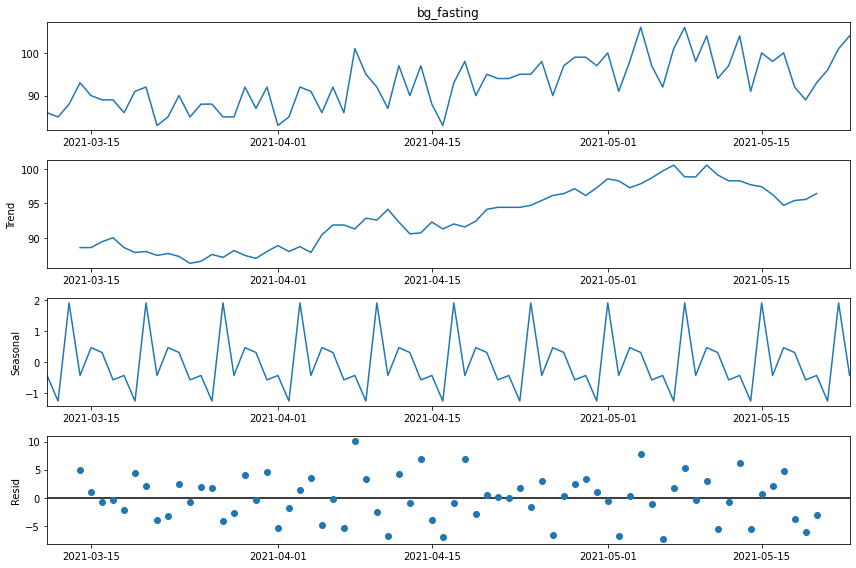

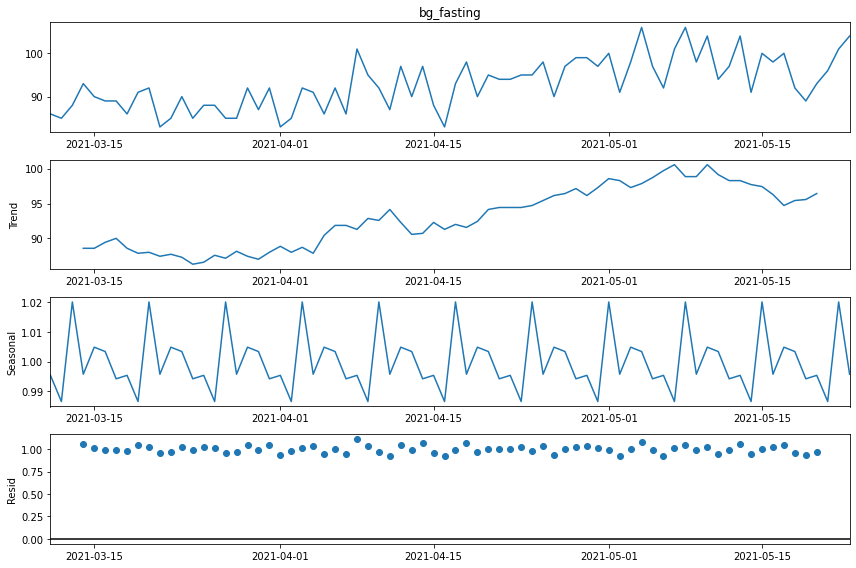

In [67]:
rcParams['figure.figsize'] = 12,8

# Plot the original data, the trend, the seasonality, and the residuals 
decomp_add = seasonal_decompose(y_r, model='additive')
decomp_add.plot()

decomp_mlt = seasonal_decompose(y_r, model='multiplicative')
decomp_mlt.plot()

plt.show()

In [68]:
y_r.index.is_monotonic

True

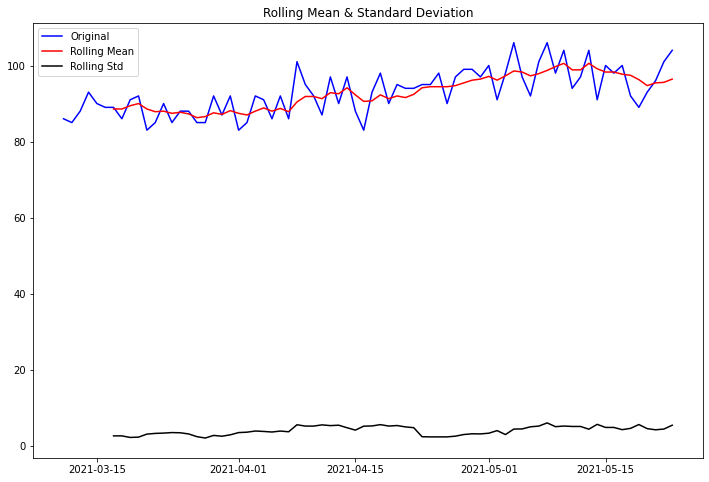

Results of Dickey-Fuller Test:
Test Statistic                 -0.829570
p-value                         0.810282
#Lags Used                      5.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64


In [69]:
test_stationarity(y_r)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


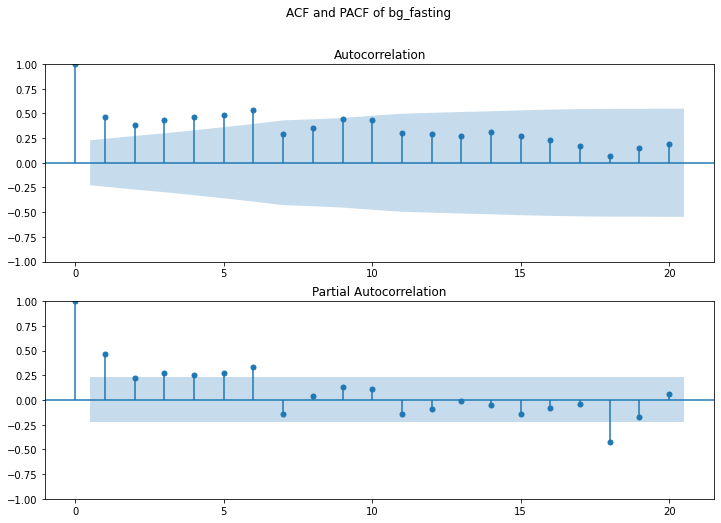

In [70]:
# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(y_r, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(y_r, lags=20, ax=axes[1])

plt.suptitle('ACF and PACF of bg_fasting')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


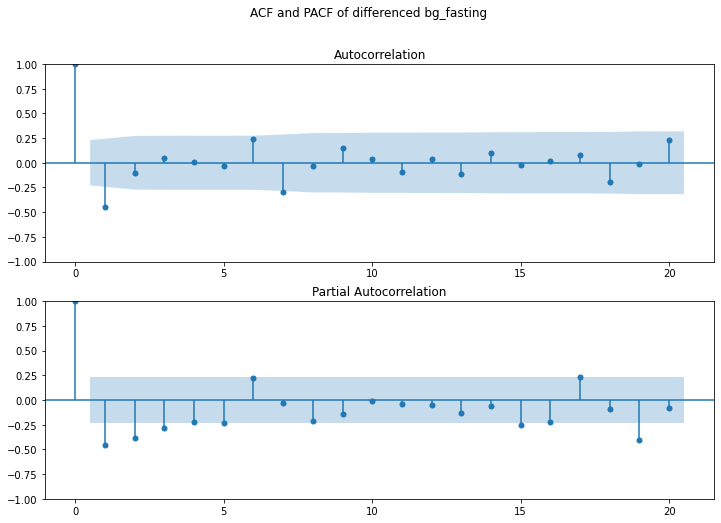

In [71]:
yr_diff = y_r.diff()
yr_diff = yr_diff.dropna()

fig, axes = plt.subplots(2,1)

plot_acf(yr_diff, lags=20, ax=axes[0])
plot_pacf(yr_diff, lags=20, ax=axes[1])

plt.suptitle('ACF and PACF of differenced bg_fasting')
plt.show()

In [72]:
print('STD of non-differenced y:', y_r.std())
print('STD of differenced y:', yr_diff.std())

STD of non-differenced y: 5.887002104643878
STD of differenced y: 5.971647878651736


In [73]:
# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARIMA(yr_diff, order=(1, 0, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARIMA(yr_diff, order=(2, 0, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARIMA(yr_diff, order=(1, 0, 1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

The AIC for an AR(1) is:  456.9062274845014
The AIC for an AR(2) is:  447.6668051201794
The AIC for an ARMA(1,1) is:  432.8241959471815


In [79]:
# Forecast using an ARIMA(1,1,1) model
mod = ARIMA(y_r, order=(1,1,1), freq="D")
res = mod.fit()

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:             bg_fasting   No. Observations:                   74
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -214.718
Date:                Thu, 24 Feb 2022   AIC                            435.435
Time:                        14:40:59   BIC                            442.307
Sample:                    03-11-2021   HQIC                           438.174
                         - 05-23-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0309      0.142     -0.217      0.828      -0.310       0.248
ma.L1         -0.8134      0.086     -9.455      0.000      -0.982      -0.645
sigma2        20.6811      3.725      5.551      0.0

Bottom value: 0.0 
 Top Value: 1.0


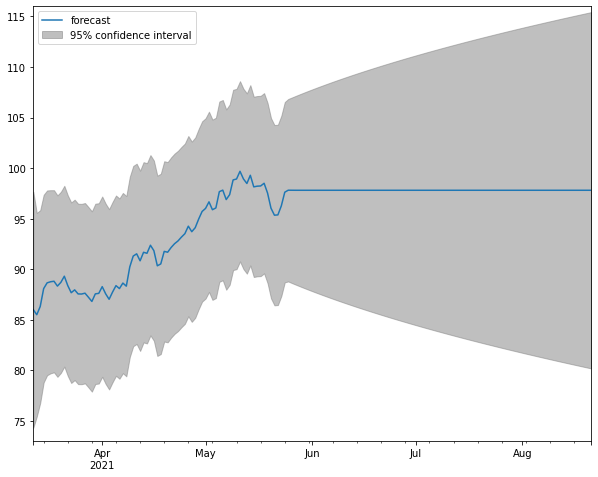

In [87]:
fig, ax = plt.subplots(figsize=(10, 8))

bottom,top = plt.ylim()
print("Bottom value:",bottom,"\n","Top Value:",top)
plt.ylim(y.min()-10, y.max()+10)

fig = plot_predict(res, start="2021-03-12", end="2021-08-21", ax=ax)
legend = ax.legend(loc="upper left")